#ML Assignment - 3 


In [31]:
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
from IPython.display import HTML
from sklearn.neural_network import MLPClassifier
from sklearn import decomposition
from sklearn import manifold
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.decomposition import PCA

In [32]:
data = pd.read_csv('data.csv')

In [33]:
data.head()

,Letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [34]:
data.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [35]:
X=data.drop('Letter',axis=1)
Y=data['Letter']

In [36]:
D = {}
for d in Y:
  if d not in D:
    D[d] = 0
  D[d] += 1
print(D)

{'T': 796, 'I': 755, 'D': 805, 'N': 783, 'G': 773, 'S': 748, 'B': 766, 'A': 789, 'J': 747, 'M': 792, 'X': 787, 'O': 753, 'R': 758, 'F': 775, 'C': 736, 'H': 734, 'W': 752, 'L': 761, 'P': 803, 'E': 768, 'V': 764, 'Y': 786, 'Q': 783, 'U': 813, 'K': 739, 'Z': 734}


In [37]:
col = X.columns
col = list(col)
x_c = data[data['Letter']=='C']
x_A = data[data['Letter']=='A']

In [38]:
# numerical_features = col # C -> data plot.
# df_copy = x_c.copy()
# RP=plt.figure(figsize=(14,16))
# for i, feature in enumerate(numerical_features):
#   r=RP.add_subplot(4,4,i+1)
#   x_min = int(df_copy[feature].min())
#   x_max = int(df_copy[feature].max())
#   range_bin_width = range(x_min, x_max, 5)
#   sns.distplot(
#         df_copy[feature], color='#123321',bins=30,
#         kde=False
#     )
#   r.set_title(feature+" Histogram Plot")
# RP.tight_layout()

In [39]:
# numerical_features = col # A -> data plot.
# df_copy = x_A.copy()
# RP=plt.figure(figsize=(14,16))
# for i, feature in enumerate(numerical_features):
#   r=RP.add_subplot(4,4,i+1)
#   x_min = int(df_copy[feature].min())
#   x_max = int(df_copy[feature].max())
#   range_bin_width = range(x_min, x_max, 5)
#   sns.distplot(
#         df_copy[feature], color='#123321',bins=30,
#         kde=False
#     )
#   r.set_title(feature+" Histogram Plot")
# RP.tight_layout()

In [40]:
#making all 26 output classes binary
AL = []
AL_n = []
Y_26 = pd.DataFrame()
for i in range(ord("A"),ord("Z")+1):
  AL.append(chr(i))
print(AL)
for y in Y:
  AL_n.append(AL.index(y))
Y_num = pd.DataFrame(data = AL_n,columns = ['Letter'])

for al in AL:
  L = []
  for y in Y:
    out = 0;
    if y == al:
      out = 1
    L.append(out)
  Y_26[al] = L

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Normalization

In [41]:
# mim-max normalization fuction
def min_max_scaling(df):

    df_norm = df.copy()

    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

In [42]:
#normalized data
X_nor = min_max_scaling(X)
Y_nor = Y_26

In [43]:
X_nor.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,0.133333,0.533333,0.2,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333
1,0.333333,0.800000,0.2,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667
2,0.266667,0.733333,0.4,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000
3,0.466667,0.733333,0.4,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333
4,0.133333,0.066667,0.2,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667


In [112]:
# Test Train Split
X_train, X_test, Y_train, Y_test = train_test_split(X_nor, Y_nor, test_size= 0.3,stratify=Y_nor,random_state=1)

In [113]:
# test validation split
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size= 0.5,stratify=Y_test,random_state=1)

#Heat map

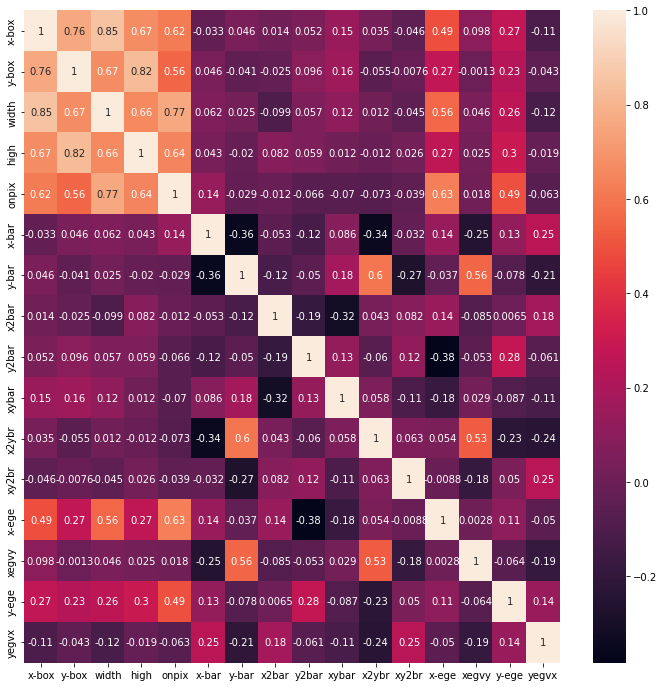

In [46]:
features_df = data.drop('Letter', axis=1)
letters = data['Letter']

f_corrs = features_df.corr()

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(f_corrs, annot=True, ax=ax)

# Multi layer perceptron classifier

In [47]:
# Normalized pandas data converted to tesor
Train_X = torch.tensor(X_train.values).float()
Train_Y = torch.tensor(Y_train.values)
Test_X = torch.tensor(X_test.values).float()
Test_Y = torch.tensor(Y_test.values)
Val_X = torch.tensor(X_val.values).float()
Val_Y = torch.tensor(Y_val.values)

In [48]:
Train_X[0],Train_Y[0]

(tensor([0.3333, 0.4000, 0.4000, 0.3333, 0.3333, 0.3333, 0.5333, 0.2000, 0.3333,
         0.4667, 0.4000, 0.6667, 0.2000, 0.6667, 0.5333, 0.4667]),
 tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]))

In [49]:

Train_Y = torch.argmax(Train_Y, dim=1)
Test_Y = torch.argmax(Test_Y, dim=1)
Val_Y = torch.argmax(Val_Y, dim=1)

In [50]:
Train_Y.size()

torch.Size([14000])

In [51]:
class MLP(nn.Module):
  def __init__(self,input_size,output_classes,hidden1_size=0,hidden2_size=0,no_of_layers=0):
    super(MLP, self).__init__()
    self.layers = no_of_layers
    if self.layers == 0:
      self.fc1 = nn.Linear(input_size,output_classes)
    elif self.layers == 1:
      self.fc1 = nn.Linear(input_size,hidden1_size)
      self.relu1 = nn.ReLU()
      self.fc2 = nn.Linear(hidden1_size, output_classes)
    else: # no of layers is 2.
      self.fc1 = nn.Linear(input_size,hidden1_size)
      self.relu1 = nn.ReLU()
      self.fc2 = nn.Linear(hidden1_size,hidden2_size)
      self.relu2 = nn.ReLU()
      self.fc3 = nn.Linear(hidden2_size,output_classes)

  def forward(self,x):
    if self.layers == 0:
      out = self.fc1(x)
    elif self.layers == 1:
      out = self.fc1(x)
      out = self.relu1(out)
      out = self.fc2(out)
    else:
      out = self.fc1(x)
      out = self.relu1(out)
      out = self.fc2(out)
      out = self.relu2(out)
      out = self.fc3(out)
    return out 

In [52]:
mlp_2 = []
#mlp_a --> neural network with no layers
mlp_a = MLP(no_of_layers=0,input_size=16,output_classes=26)
#mlp_a --> neural network with 1 layer with 2 nodes
mlp_b = MLP(no_of_layers=1,input_size=16,hidden1_size=2,output_classes=26)
#mlp_a --> neural network with 2 layers with 6 nodes
mlp_c = MLP(no_of_layers=1,input_size=16,hidden1_size=6,output_classes=26)
#mlp_a --> neural network with 2 layers with 2 nodes and 3 nodes
mlp_d = MLP(no_of_layers=2,input_size=16,hidden1_size=2,hidden2_size=3,output_classes=26)
#mlp_a --> neural network with 2 layers with 3 nodes and  2 nodes
mlp_e = MLP(no_of_layers=2,input_size=16,hidden1_size=3,hidden2_size=2,output_classes=26)
if torch.cuda.is_available():
  mlp_a = mlp_a.cuda()
  mlp_2.append(mlp_a)
  mlp_b = mlp_b.cuda()
  mlp_2.append(mlp_b)
  mlp_c = mlp_c.cuda()
  mlp_2.append(mlp_c)
  mlp_d = mlp_d.cuda()
  mlp_2.append(mlp_d)
  mlp_e = mlp_e.cuda()
  mlp_2.append(mlp_e)
  

In [53]:
mlp_c.forward(Train_X[0].cuda())

tensor([ 0.1420, -0.0141, -0.3362, -0.2449, -0.1397, -0.1735,  0.0625, -0.1175,
        -0.0238, -0.3343, -0.2185, -0.1878, -0.0456,  0.1646, -0.1257,  0.4055,
        -0.4692,  0.0193,  0.2261,  0.2071, -0.1639, -0.1467, -0.0586,  0.2909,
        -0.2783, -0.2278], device='cuda:0', grad_fn=<AddBackward0>)

In [54]:
def next_batch(inputs, targets, batchSize):
	for i in range(0, inputs.shape[0], batchSize):
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])

In [55]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float()# / y.shape[0]
    return acc

In [56]:
def TRAIN_TEST(model, X_train,Y_train,X_val,Y_val,X_test,Y_test,epochs = 100, lr= 0.1):
  # Declaring lossfunc and Optimizer
  lossfunc = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = lr)
  # Training with Validation 
  # # # train data # # #____________________________________________
  epochs = epochs
  for e in tqdm_notebook(range(epochs)):
      train_loss = 0.0
      best_acc = 0.0
      train_acc = 0.0
      samples1 = 0.0
      model.train()
      for data, labels in next_batch(X_train, Y_train, Batch_size):
          # Transfer Data to GPU if available
          if torch.cuda.is_available():
              data, labels = data.cuda(), labels.cuda()
          
          # Clear the gradients
          optimizer.zero_grad()
          # Forward Pass
          target = model.forward(data)
          # Find the Loss
          loss = lossfunc(target,labels)
          # Calculate gradients
          loss.backward()
          # Update Weights
          optimizer.step()
          # Calculate Loss
          train_loss += loss.item()*labels.size(0)
          train_acc += calculate_accuracy(target,labels).item()
          samples1 += labels.size(0)
      train_acc /= Y_train.size(0)
      

      # # # validation data # # #_____________________________________
      valid_loss = 0.0
      valid_acc = 0.0 
      samples2 = 0.0
      model.eval()     # Optional when not using Model Specific layer
      for data, labels in next_batch(X_val, Y_val, Batch_size):
          # Transfer Data to GPU if available
          if torch.cuda.is_available():
              data, labels = data.cuda(), labels.cuda()
          
          # Forward Pass
          target = model.forward(data)
          # Find the Loss
          loss = lossfunc(target,labels)
          # Calculate Loss
          valid_loss += loss.item()
          valid_acc += calculate_accuracy(target,labels).item()
          samples2 += labels.size(0)
      valid_acc /= Y_val.size(0)


  # # #  test data # # #_________________________________________
  test_loss = 0.0
  test_acc = 0.0 
  samples3 = 0.0
  model.eval()     # Optional when not using Model Specific layer
  with torch.no_grad():
    for data, labels in next_batch(X_test, Y_test, Batch_size):
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        # Forward Pass
        target = model.forward(data)
        # Find the Loss
        loss = lossfunc(target,labels)
        # Calculate Loss
        test_loss += loss.item()
        test_acc += calculate_accuracy(target,labels).item()
        samples3 += labels.size(0)
    test_acc /= Y_test.size(0)

  trainTemplate = "for epoch: {} train loss: {:.3f} best train accuracy: {:.3f} for learning rate : {}"
  print(trainTemplate.format(epochs, (train_loss / samples1),(train_acc )*100,lr))
  validTemplate = "for epoch: {} valid loss: {:.3f} best valid accuracy: {:.3f} for learning rate : {}"
  print(validTemplate.format(epochs, (valid_loss / samples2),(valid_acc )*100,lr))
  testTemplate = "test loss: {:.3f} test accuracy: {:.3f} for learning rate : {}"
  print(testTemplate.format((test_loss / samples3),(test_acc )*100,lr))
  print("")
  return (train_acc,valid_acc,test_acc)


In [160]:
learning_rates = [0.1,0.01,0.001,0.0001,0.00001]
# ACC = []
Batch_size = 64
# i = 'a'
# for model in mlp_2:
#   AC = []
#   print(i," model")
#   i = chr(ord(i) + 1)
#   for lr in learning_rates:
#     (trA,vA,teA) = TRAIN_TEST(model=mlp_2[0],lr = lr,X_train=Train_X,Y_train=Train_Y,X_val=Val_X,Y_val=Val_Y,X_test=Test_X,Y_test = Test_Y)
#     AC.append((trA,vA,teA))
#   ACC.append(AC)
LOG=[]
logs=[]
print("-------------------------  Model with 0 hidden layers  --------------------------------\n")
for lr in learning_rates:
  mlp_2[0] = MLP(no_of_layers=0,input_size=16,output_classes=26).cuda()
  t=TRAIN_TEST(model=mlp_2[0],lr = lr,X_train=Train_X,Y_train=Train_Y,X_val=Val_X,Y_val=Val_Y,X_test=Test_X,Y_test = Test_Y)
  logs.append(t)
LOG.append(logs)
logs=[]
print("-------------------------  Model with 1 hidden layers 2 nodes  --------------------------------\n")
for lr in learning_rates:
  mlp_2[1] = MLP(no_of_layers=1,input_size=16,hidden1_size=2,output_classes=26).cuda()
  t=TRAIN_TEST(model=mlp_2[1],lr = lr,X_train=Train_X,Y_train=Train_Y,X_val=Val_X,Y_val=Val_Y,X_test=Test_X,Y_test = Test_Y)
  logs.append(t)
LOG.append(logs)
logs=[]
print("-------------------------  Model with 1 hidden layers 6 nodes  --------------------------------\n")

for lr in learning_rates:
  mlp_2[2] = MLP(no_of_layers=1,input_size=16,hidden1_size=6,output_classes=26).cuda()
  t=TRAIN_TEST(model=mlp_2[2],lr = lr,X_train=Train_X,Y_train=Train_Y,X_val=Val_X,Y_val=Val_Y,X_test=Test_X,Y_test = Test_Y)
  logs.append(t)
LOG.append(logs)
logs=[]
print("-------------------------  Model with 2 hidden layers 2,3 nodes  --------------------------------\n")

for lr in learning_rates:
  mlp_2[3] =MLP(no_of_layers=2,input_size=16,hidden1_size=2,hidden2_size=3,output_classes=26).cuda()
  t=TRAIN_TEST(model=mlp_2[3],lr = lr,X_train=Train_X,Y_train=Train_Y,X_val=Val_X,Y_val=Val_Y,X_test=Test_X,Y_test = Test_Y)
  logs.append(t)
LOG.append(logs)
logs=[]
print("-------------------------  Model with 2 hidden layers 3,2 nodes  --------------------------------\n")

for lr in learning_rates:
  mlp_2[4] = MLP(no_of_layers=2,input_size=16,hidden1_size=3,hidden2_size=2,output_classes=26).cuda()
  t=TRAIN_TEST(model=mlp_2[4],lr = lr,X_train=Train_X,Y_train=Train_Y,X_val=Val_X,Y_val=Val_Y,X_test=Test_X,Y_test = Test_Y)
  logs.append(t)
LOG.append(logs)

-------------------------  Model with 0 hidden layers  --------------------------------



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 1.417 best train accuracy: 68.450 for learning rate : 0.1
for epoch: 100 valid loss: 0.023 best valid accuracy: 67.867 for learning rate : 0.1
test loss: 0.022 test accuracy: 67.933 for learning rate : 0.1



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 2.549 best train accuracy: 52.957 for learning rate : 0.01
for epoch: 100 valid loss: 0.040 best valid accuracy: 53.000 for learning rate : 0.01
test loss: 0.040 test accuracy: 53.267 for learning rate : 0.01



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.170 best train accuracy: 16.157 for learning rate : 0.001
for epoch: 100 valid loss: 0.050 best valid accuracy: 16.233 for learning rate : 0.001
test loss: 0.050 test accuracy: 16.267 for learning rate : 0.001



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.270 best train accuracy: 4.043 for learning rate : 0.0001
for epoch: 100 valid loss: 0.051 best valid accuracy: 4.067 for learning rate : 0.0001
test loss: 0.051 test accuracy: 3.800 for learning rate : 0.0001



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.287 best train accuracy: 4.907 for learning rate : 1e-05
for epoch: 100 valid loss: 0.051 best valid accuracy: 4.333 for learning rate : 1e-05
test loss: 0.052 test accuracy: 4.500 for learning rate : 1e-05

-------------------------  Model with 1 hidden layers 2 nodes  --------------------------------



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 2.550 best train accuracy: 15.471 for learning rate : 0.1
for epoch: 100 valid loss: 0.040 best valid accuracy: 14.100 for learning rate : 0.1
test loss: 0.040 test accuracy: 14.567 for learning rate : 0.1



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.258 best train accuracy: 4.064 for learning rate : 0.01
for epoch: 100 valid loss: 0.051 best valid accuracy: 4.067 for learning rate : 0.01
test loss: 0.051 test accuracy: 4.067 for learning rate : 0.01



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.244 best train accuracy: 3.143 for learning rate : 0.001
for epoch: 100 valid loss: 0.051 best valid accuracy: 3.567 for learning rate : 0.001
test loss: 0.051 test accuracy: 3.267 for learning rate : 0.001



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.317 best train accuracy: 3.929 for learning rate : 0.0001
for epoch: 100 valid loss: 0.052 best valid accuracy: 3.933 for learning rate : 0.0001
test loss: 0.052 test accuracy: 3.933 for learning rate : 0.0001



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.343 best train accuracy: 3.929 for learning rate : 1e-05
for epoch: 100 valid loss: 0.052 best valid accuracy: 3.933 for learning rate : 1e-05
test loss: 0.052 test accuracy: 3.933 for learning rate : 1e-05

-------------------------  Model with 1 hidden layers 6 nodes  --------------------------------



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 1.112 best train accuracy: 69.329 for learning rate : 0.1
for epoch: 100 valid loss: 0.018 best valid accuracy: 69.967 for learning rate : 0.1
test loss: 0.017 test accuracy: 70.767 for learning rate : 0.1



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 1.752 best train accuracy: 51.471 for learning rate : 0.01
for epoch: 100 valid loss: 0.028 best valid accuracy: 49.800 for learning rate : 0.01
test loss: 0.027 test accuracy: 51.033 for learning rate : 0.01



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.223 best train accuracy: 4.879 for learning rate : 0.001
for epoch: 100 valid loss: 0.050 best valid accuracy: 4.900 for learning rate : 0.001
test loss: 0.050 test accuracy: 4.867 for learning rate : 0.001



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.278 best train accuracy: 3.757 for learning rate : 0.0001
for epoch: 100 valid loss: 0.051 best valid accuracy: 3.767 for learning rate : 0.0001
test loss: 0.051 test accuracy: 3.767 for learning rate : 0.0001



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.271 best train accuracy: 3.807 for learning rate : 1e-05
for epoch: 100 valid loss: 0.051 best valid accuracy: 3.800 for learning rate : 1e-05
test loss: 0.051 test accuracy: 3.800 for learning rate : 1e-05

-------------------------  Model with 2 hidden layers 2,3 nodes  --------------------------------



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 2.063 best train accuracy: 32.521 for learning rate : 0.1
for epoch: 100 valid loss: 0.032 best valid accuracy: 32.367 for learning rate : 0.1
test loss: 0.032 test accuracy: 33.533 for learning rate : 0.1



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 2.668 best train accuracy: 14.686 for learning rate : 0.01
for epoch: 100 valid loss: 0.042 best valid accuracy: 16.000 for learning rate : 0.01
test loss: 0.042 test accuracy: 15.833 for learning rate : 0.01



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.259 best train accuracy: 4.129 for learning rate : 0.001
for epoch: 100 valid loss: 0.051 best valid accuracy: 4.267 for learning rate : 0.001
test loss: 0.051 test accuracy: 4.067 for learning rate : 0.001



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.314 best train accuracy: 3.693 for learning rate : 0.0001
for epoch: 100 valid loss: 0.052 best valid accuracy: 3.700 for learning rate : 0.0001
test loss: 0.052 test accuracy: 3.700 for learning rate : 0.0001



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.399 best train accuracy: 3.914 for learning rate : 1e-05
for epoch: 100 valid loss: 0.053 best valid accuracy: 3.933 for learning rate : 1e-05
test loss: 0.053 test accuracy: 3.900 for learning rate : 1e-05

-------------------------  Model with 2 hidden layers 3,2 nodes  --------------------------------



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 1.921 best train accuracy: 37.921 for learning rate : 0.1
for epoch: 100 valid loss: 0.031 best valid accuracy: 37.467 for learning rate : 0.1
test loss: 0.030 test accuracy: 38.900 for learning rate : 0.1



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 2.804 best train accuracy: 11.614 for learning rate : 0.01
for epoch: 100 valid loss: 0.044 best valid accuracy: 11.767 for learning rate : 0.01
test loss: 0.044 test accuracy: 11.867 for learning rate : 0.01



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.273 best train accuracy: 4.679 for learning rate : 0.001
for epoch: 100 valid loss: 0.051 best valid accuracy: 4.167 for learning rate : 0.001
test loss: 0.051 test accuracy: 4.633 for learning rate : 0.001



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.319 best train accuracy: 3.829 for learning rate : 0.0001
for epoch: 100 valid loss: 0.052 best valid accuracy: 3.833 for learning rate : 0.0001
test loss: 0.052 test accuracy: 3.833 for learning rate : 0.0001



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 3.368 best train accuracy: 3.736 for learning rate : 1e-05
for epoch: 100 valid loss: 0.053 best valid accuracy: 3.733 for learning rate : 1e-05
test loss: 0.053 test accuracy: 3.733 for learning rate : 1e-05



In [161]:
ACC = LOG

In [162]:
ACC

[[(0.6845, 0.6786666666666666, 0.6793333333333333),
  (0.5295714285714286, 0.53, 0.5326666666666666),
  (0.16157142857142856, 0.16233333333333333, 0.16266666666666665),
  (0.04042857142857143, 0.04066666666666666, 0.038),
  (0.04907142857142857, 0.043333333333333335, 0.045)],
 [(0.15471428571428572, 0.141, 0.14566666666666667),
  (0.04064285714285714, 0.04066666666666666, 0.04066666666666666),
  (0.03142857142857143, 0.035666666666666666, 0.03266666666666666),
  (0.039285714285714285, 0.03933333333333333, 0.03933333333333333),
  (0.039285714285714285, 0.03933333333333333, 0.03933333333333333)],
 [(0.6932857142857143, 0.6996666666666667, 0.7076666666666667),
  (0.5147142857142857, 0.498, 0.5103333333333333),
  (0.048785714285714286, 0.049, 0.048666666666666664),
  (0.03757142857142857, 0.03766666666666667, 0.03766666666666667),
  (0.03807142857142857, 0.038, 0.038)],
 [(0.32521428571428573, 0.32366666666666666, 0.3353333333333333),
  (0.14685714285714285, 0.16, 0.15833333333333333),
  (

In [163]:
logs=[]
for i in range(0,5):
  mt=ACC[i]
  tr=[]
  ts=[]  
  v=[]
  for j in range(5):
    tr.append(mt[j][0])
    ts.append(mt[j][2])
    v.append(mt[j][1])
  logs.append((tr,ts,v))


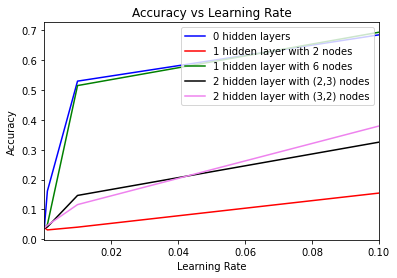

In [164]:
# plot's learning rate vs accuracies
plt.xlim(0.00001,0.1)
plt.plot(learning_rates,logs[0][0], color='blue', label='0 hidden layers')
plt.plot(learning_rates,logs[1][0], color='r', label='1 hidden layer with 2 nodes')
plt.plot(learning_rates,logs[2][0], color='g', label='1 hidden layer with 6 nodes')
plt.plot(learning_rates, logs[3][0], color='black', label='2 hidden layer with (2,3) nodes')
plt.plot(learning_rates, logs[4][0], color='violet', label='2 hidden layer with (3,2) nodes')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Learning Rate")
plt.legend()
plt.show()

In [165]:
lr0=[]
lr1=[]
lr2=[]
lr3=[]
lr4=[]
for k in range(0,5):
  for i in range(0,5):
    if i == 0:
      lr0.append(ACC[k][i][0])
    if i == 1:
      lr1.append(ACC[k][i][0])
    if i == 2:
      lr2.append(ACC[k][i][0])
    if i == 3:
      lr3.append(ACC[k][i][0])
    if i == 4:
      lr4.append(ACC[k][i][0])


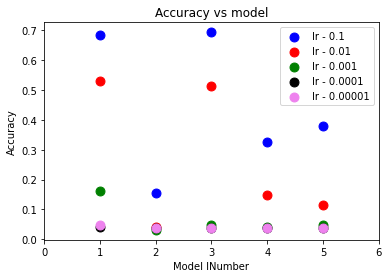

In [166]:
# plot's learning rate vs accuracies
model_numbers = [1,2,3,4,5]
plt.xlim(0,6)
plt.scatter(model_numbers,lr0,s=80, c='blue', label='lr - 0.1')
plt.scatter(model_numbers,lr1, s=80, c='r', label='lr - 0.01')
plt.scatter(model_numbers,lr2, s=80, c='g', label='lr - 0.001')
plt.scatter(model_numbers, lr3, s=80, c='black', label='lr - 0.0001')
plt.scatter(model_numbers, lr4, s=80, c='violet', label='lr - 0.00001')
plt.xlabel("Model lNumber")
plt.ylabel("Accuracy")
plt.title("Accuracy vs model")
plt.legend()
plt.show()

#PCA dimentionlity reduction

In [171]:
def get_pca(data, n_components = 2,ft = True):
    pca = decomposition.PCA()
    pca.n_components = n_components
    pca_data = pca.fit_transform(data)
    return pca_data,pca

In [132]:
def plot_representations(finalDf):
    fig = plt.figure(figsize = (40,40))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA of 26 letter classes', fontsize = 20)
    targets = AL
    colors = plt.cm.viridis(np.linspace(0, 1,26))
    # colors = ['r','b','y']
    for target, color in zip(targets,colors):
        color = color.reshape(1,-1)
        indicesToKeep = finalDf['Letter'] == (ord(target)-ord('A'))
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                  , finalDf.loc[indicesToKeep, 'principal component 2']
                  , c = color
                  , s = 100)
    ax.legend(targets)
    ax.grid()

In [172]:
pc,pca = get_pca(X_train,n_components=2)

In [102]:
#principal axis in feature space
print(pd.DataFrame(pca.components_,columns=X_train.columns,index = ['PC1','PC2']))

        x-box     y-box     width  ...     xegvy     y-ege     yegvx
PC1  0.334696  0.598359  0.352192  ...  0.000171  0.226197 -0.014370
PC2  0.087998  0.075217  0.068979  ...  0.278158 -0.232484 -0.183355

[2 rows x 16 columns]


In [124]:
finalDf = pd.DataFrame(data = pc
             , columns = ['principal component 1', 'principal component 2'])
Y_train_1 = torch.tensor(Y_train.values)
Y_train_1 = torch.argmax(Y_train_1, dim=1)
Y_train_1 = pd.DataFrame(Y_train_1.numpy())
Y_train_1.columns = ['Letter']
Y_train_1
Y_train_1 = Y_train_1.rename(columns = {'0': 'Letter'}, inplace = True)

finalDf = pd.concat([finalDf, Y_train_1], axis = 1)

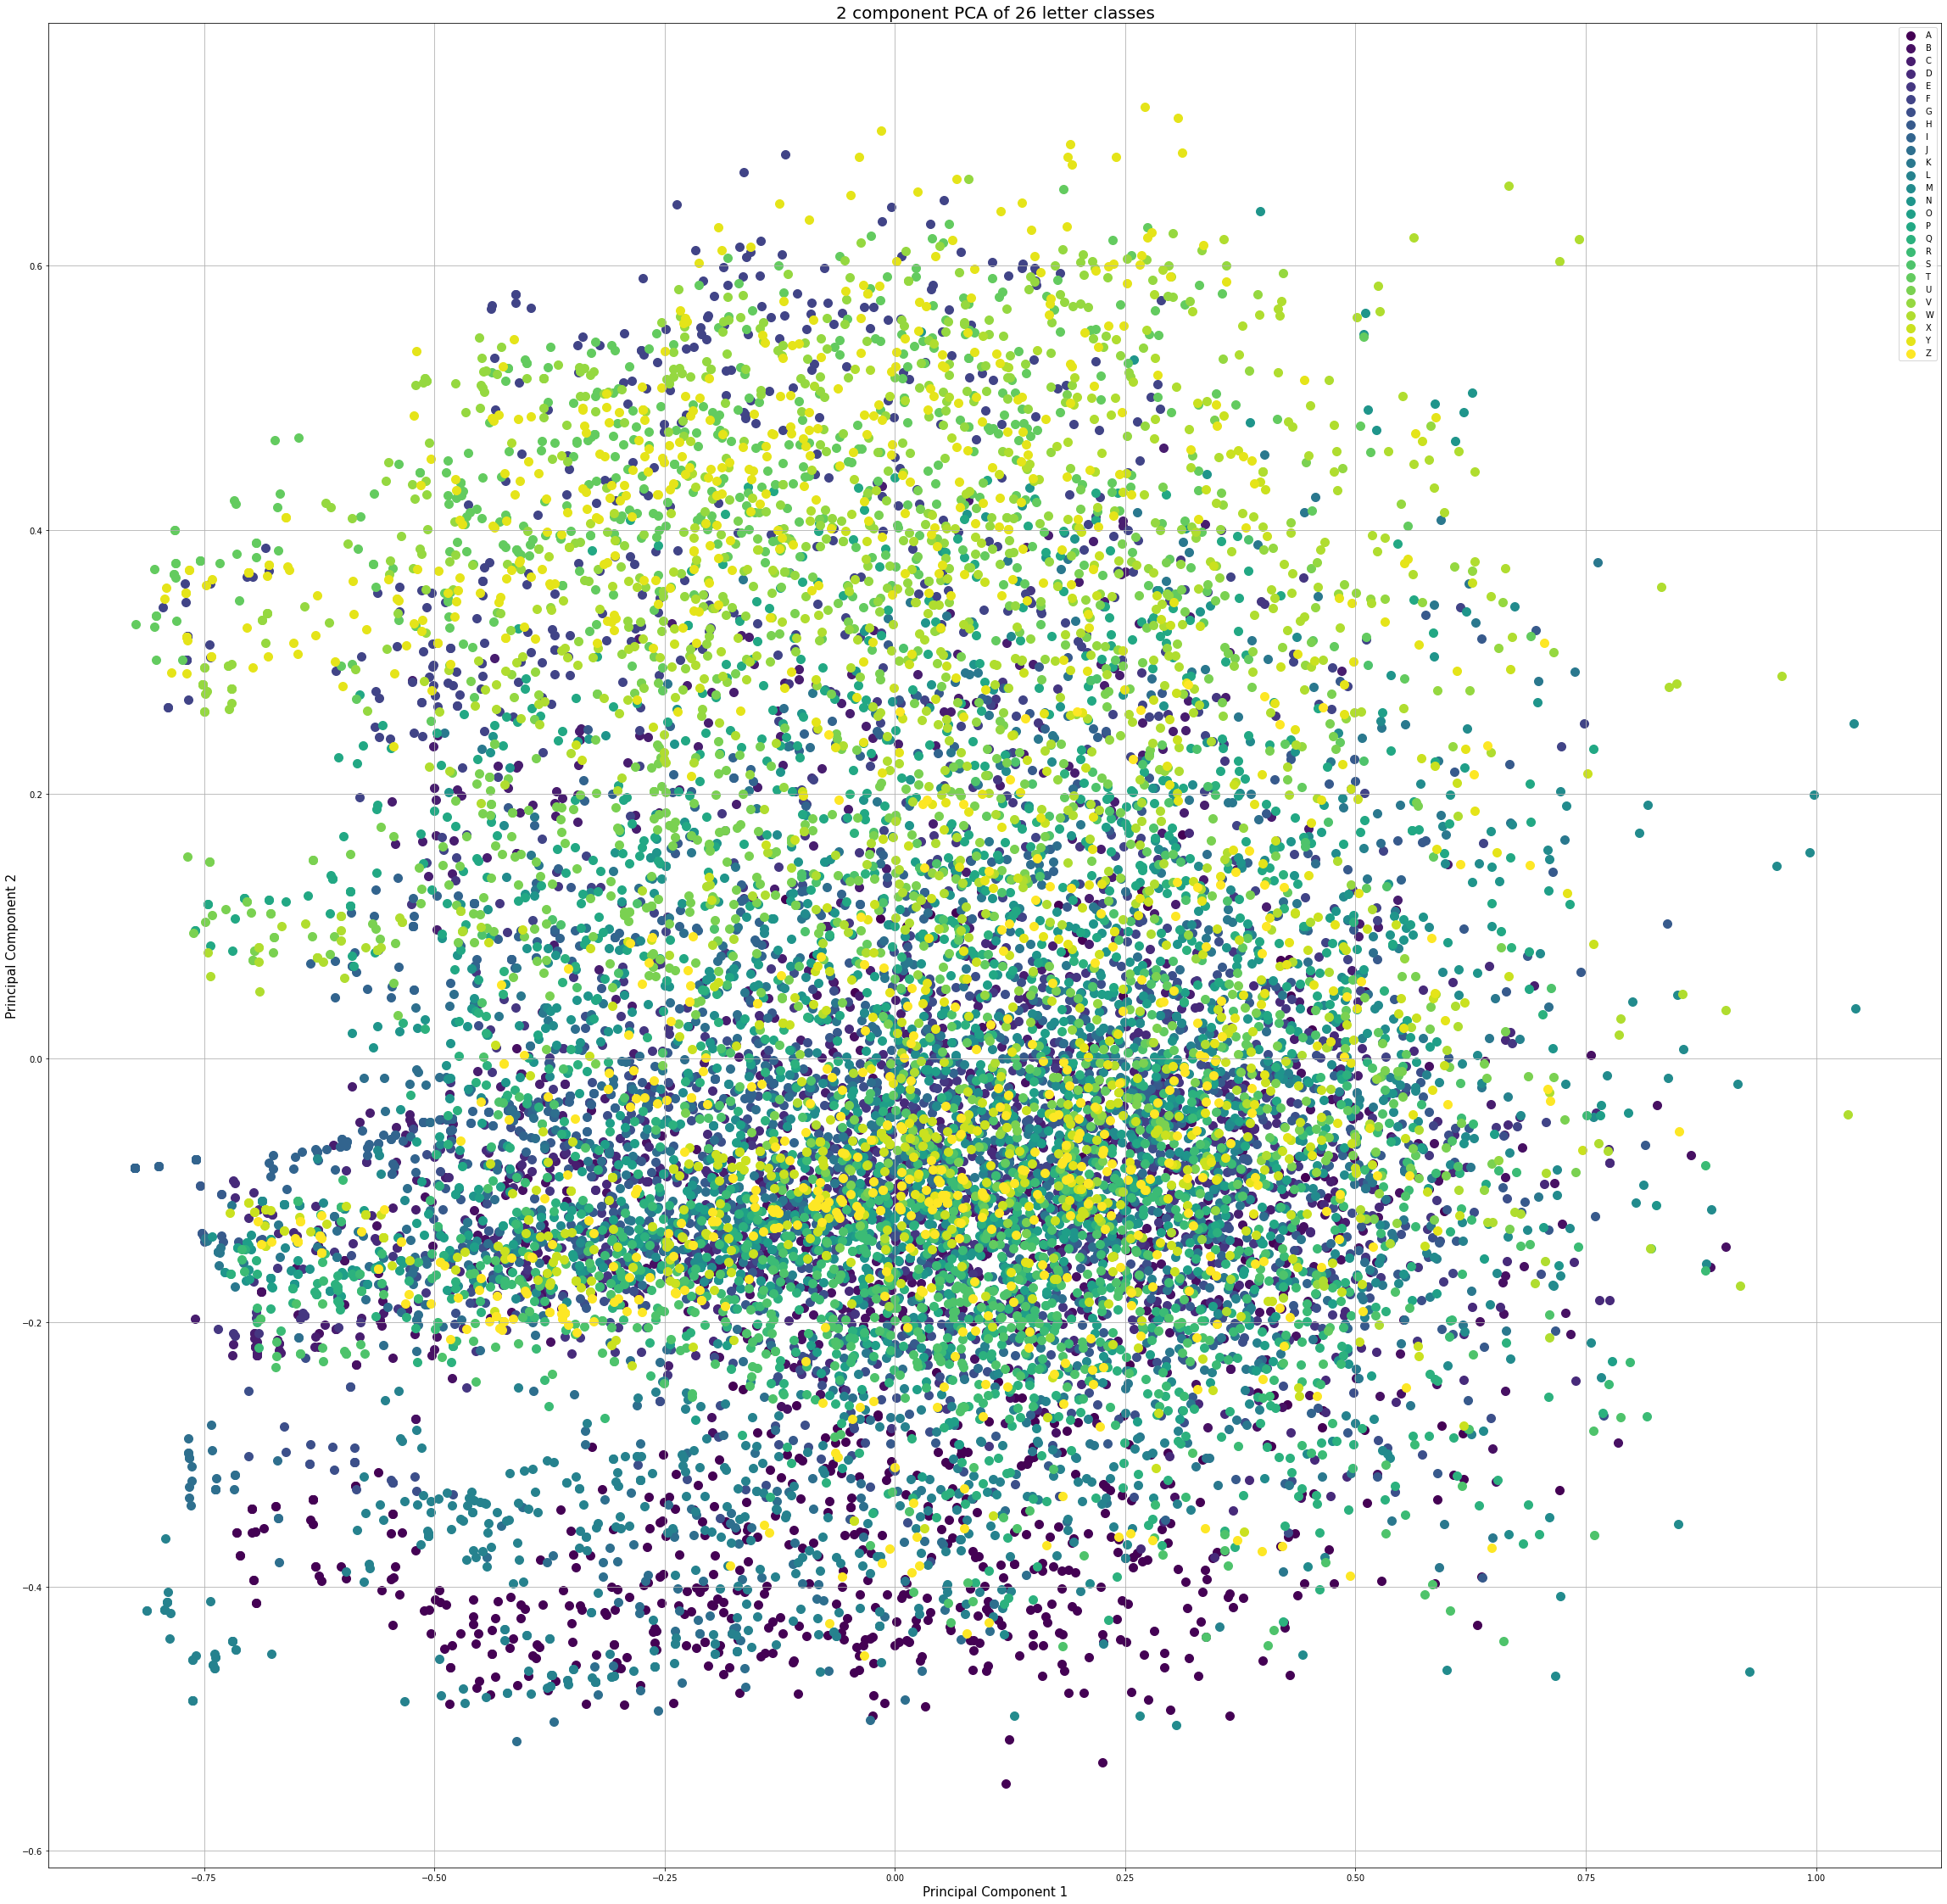

In [155]:
plot_representations(finalDf)

In [173]:
pct = pca.transform(X_test)
pcv = pca.transform(X_val)
Train_X_p = torch.from_numpy(pc).float()
Test_X_p = torch.from_numpy(pct).float()
Val_X_p = torch.from_numpy(pcv).float()

In [174]:
Train_Y_p = Train_Y
Test_Y_p = Test_Y
Val_Y_p = Val_Y
Val_X_p.size()

torch.Size([3000, 2])

In [148]:
Train_Y_p.size()

torch.Size([14000])

In [176]:
mlp_6 = []
#mlp_a_pca --> neural network with no layers
mlp_a_pca = MLP(no_of_layers=0,input_size=2,output_classes=26)
#mlp_a_pca --> neural network with 1 layer with 2 nodes
mlp_b_pca = MLP(no_of_layers=1,input_size=2,hidden1_size=2,output_classes=26)
#mlp_a_pca --> neural network with 2 layers with 6 nodes
mlp_c_pca = MLP(no_of_layers=1,input_size=2,hidden1_size=6,output_classes=26)
#mlp_a_pca --> neural network with 2 layers with 2 nodes and 3 nodes
mlp_d_pca = MLP(no_of_layers=2,input_size=2,hidden1_size=2,hidden2_size=3,output_classes=26)
#mlp_a_pca --> neural network with 2 layers with 3 nodes and  2 nodes
mlp_e_pca = MLP(no_of_layers=2,input_size=2,hidden1_size=3,hidden2_size=2,output_classes=26)
if torch.cuda.is_available():
  mlp_a_pca = mlp_a_pca.cuda()
  mlp_6.append(mlp_a_pca)
  mlp_b_pca = mlp_b_pca.cuda()
  mlp_6.append(mlp_b_pca)
  mlp_c_pca = mlp_c_pca.cuda()
  mlp_6.append(mlp_c_pca)
  mlp_d_pca = mlp_d_pca.cuda()
  mlp_6.append(mlp_d_pca)
  mlp_e_pca = mlp_e_pca.cuda()
  mlp_6.append(mlp_e_pca)

In [177]:
learning_rates = [0.1]
Batch_size = 64
LOG=[]
logs=[]
print("-------------------------  Model with 0 hidden layers  --------------------------------\n")
for lr in learning_rates:
  t=TRAIN_TEST(model=mlp_6[0],lr = lr,X_train=Train_X_p,Y_train=Train_Y_p,X_val=Val_X_p,Y_val=Val_Y_p,X_test=Test_X_p,Y_test = Test_Y_p)
  logs.append(t)
LOG.append(logs)
logs=[]
print("-------------------------  Model with 1 hidden layers 2 nodes  --------------------------------\n")
for lr in learning_rates:
  t=TRAIN_TEST(model=mlp_6[1],lr = lr,X_train=Train_X_p,Y_train=Train_Y_p,X_val=Val_X_p,Y_val=Val_Y_p,X_test=Test_X_p,Y_test = Test_Y_p)
  logs.append(t)
LOG.append(logs)
logs=[]
print("-------------------------  Model with 1 hidden layers 6 nodes  --------------------------------\n")

for lr in learning_rates:
  t=TRAIN_TEST(model=mlp_6[2],lr = lr,X_train=Train_X_p,Y_train=Train_Y_p,X_val=Val_X_p,Y_val=Val_Y_p,X_test=Test_X_p,Y_test = Test_Y_p)
  logs.append(t)
LOG.append(logs)
logs=[]
print("-------------------------  Model with 2 hidden layers 2,3 nodes  --------------------------------\n")

for lr in learning_rates:
  t=TRAIN_TEST(model=mlp_6[3],lr = lr,X_train=Train_X_p,Y_train=Train_Y_p,X_val=Val_X_p,Y_val=Val_Y_p,X_test=Test_X_p,Y_test = Test_Y_p)
  logs.append(t)
LOG.append(logs)
logs=[]
print("-------------------------  Model with 2 hidden layers 3,2 nodes  --------------------------------\n")

for lr in learning_rates:
  t=TRAIN_TEST(model=mlp_6[4],lr = lr,X_train=Train_X_p,Y_train=Train_Y_p,X_val=Val_X_p,Y_val=Val_Y_p,X_test=Test_X_p,Y_test = Test_Y_p)
  logs.append(t)
LOG.append(logs)

-------------------------  Model with 0 hidden layers  --------------------------------



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 2.785 best train accuracy: 14.607 for learning rate : 0.1
for epoch: 100 valid loss: 0.044 best valid accuracy: 13.433 for learning rate : 0.1
test loss: 0.044 test accuracy: 13.467 for learning rate : 0.1

-------------------------  Model with 1 hidden layers 2 nodes  --------------------------------



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 2.743 best train accuracy: 14.000 for learning rate : 0.1
for epoch: 100 valid loss: 0.043 best valid accuracy: 12.933 for learning rate : 0.1
test loss: 0.043 test accuracy: 12.933 for learning rate : 0.1

-------------------------  Model with 1 hidden layers 6 nodes  --------------------------------



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 2.696 best train accuracy: 15.529 for learning rate : 0.1
for epoch: 100 valid loss: 0.043 best valid accuracy: 14.933 for learning rate : 0.1
test loss: 0.042 test accuracy: 15.733 for learning rate : 0.1

-------------------------  Model with 2 hidden layers 2,3 nodes  --------------------------------



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 2.737 best train accuracy: 14.557 for learning rate : 0.1
for epoch: 100 valid loss: 0.043 best valid accuracy: 12.900 for learning rate : 0.1
test loss: 0.043 test accuracy: 12.667 for learning rate : 0.1

-------------------------  Model with 2 hidden layers 3,2 nodes  --------------------------------



  0%|          | 0/100 [00:00<?, ?it/s]

for epoch: 100 train loss: 2.724 best train accuracy: 14.457 for learning rate : 0.1
for epoch: 100 valid loss: 0.043 best valid accuracy: 14.367 for learning rate : 0.1
test loss: 0.042 test accuracy: 15.133 for learning rate : 0.1

